# LetsGrowMore

## Task 1: 
## B. Stock Market Prediction and Forecasting Using LSTM
## Author : Vivek Prakash Upreti (Data Science Intern @ LetsGrowMore)

# Dataset:https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


### Import The Required LibrarLibraries 

In [19]:
import pandas as pd                 #import packages
import numpy as np
import matplotlib.pyplot as plt       #to plot within notebook
%matplotlib inline
from matplotlib.pylab import rcParams   #setting figure size
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler     #for normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential                  #for forecasting using LSTM
from keras.layers import Dense, Dropout, LSTM

### Load The Data

In [20]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [21]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [22]:
df.shape

(2035, 8)

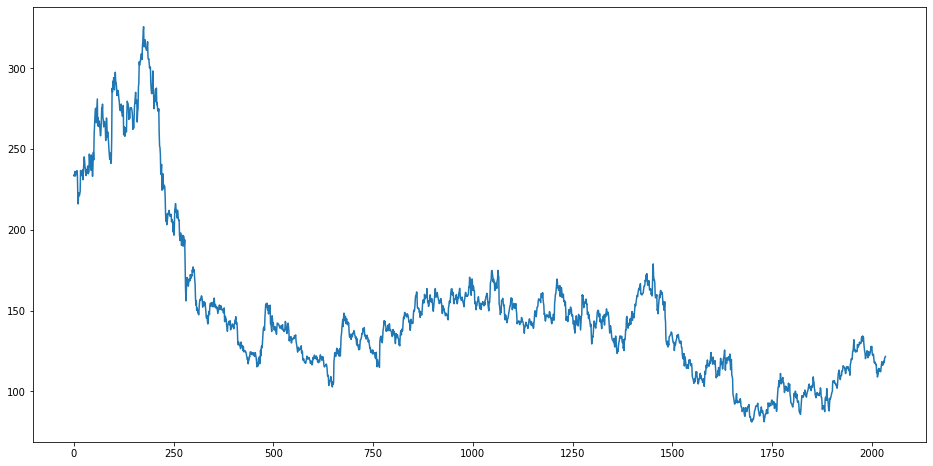

In [23]:
## we will consider the closing price as the target variable
## Plot the Close feature for see how its shaping our data

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [24]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Forecasting Using LSTM (Long Short Term Memory)

### Creating dataframe

In [25]:

data_nse = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data_nse)):
    new_data['Date'][i] = data_nse['Date'][i]
    new_data['Close'][i] = data_nse['Close'][i]

In [26]:
# setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

### Splitting The Data Into Train And Test

In [27]:

dataset = new_data.values
train = dataset[0:1424,:]
test = dataset[1424:,:]

In [28]:
# dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### Model Fitting

In [30]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


1364/1364 - 34s - loss: 0.0020


### Prediction Test

In [33]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [34]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [35]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

### Result

In [36]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

4.665450226643637

C:\Users\VIVEKP~1\AppData\Local\Temp/ipykernel_13568/3166983674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


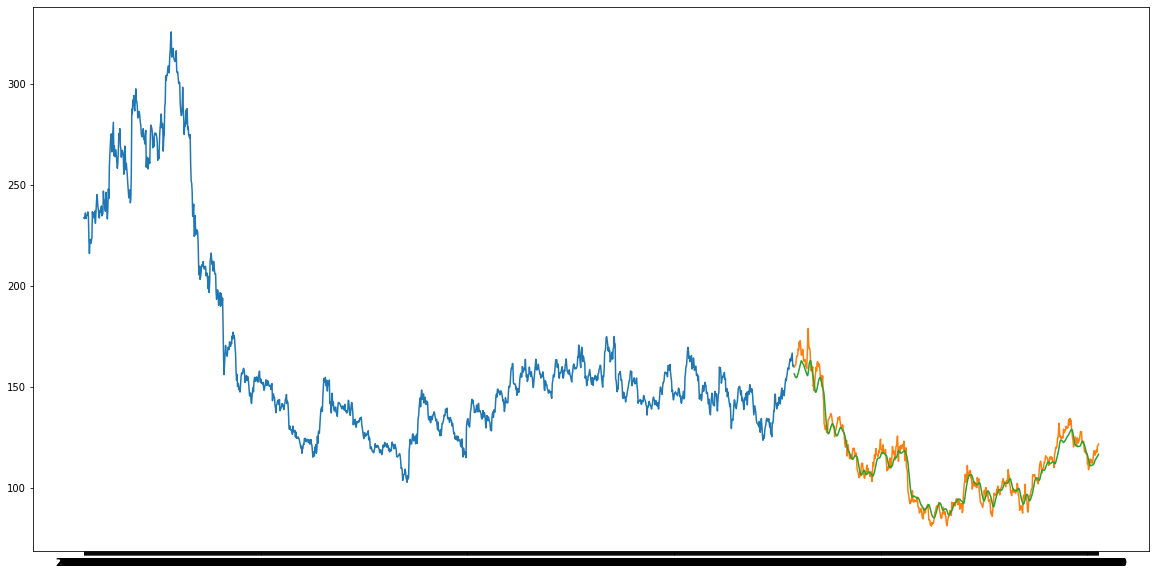

In [37]:
#for plotting
train = new_data[:1424]
valid = new_data[1424:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])